## Problem Statment -Predict the employee salary based on experience in number of years .
## Predict the value of Y(Depedent Variable)  with the help of X (Independent Variable).


### Import libraries

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , accuracy_score

## Load Data

In [44]:
df = pd.read_csv('Salary.csv') # reading the data 
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [45]:
df.head() # Use of head 

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
df.tail() # use of tail

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [47]:

df.max() # Maximum salary 

YearsExperience        13.5
Salary             139465.0
dtype: float64

# Perform EDA & Visualisations 

## Checking for NULl Values 

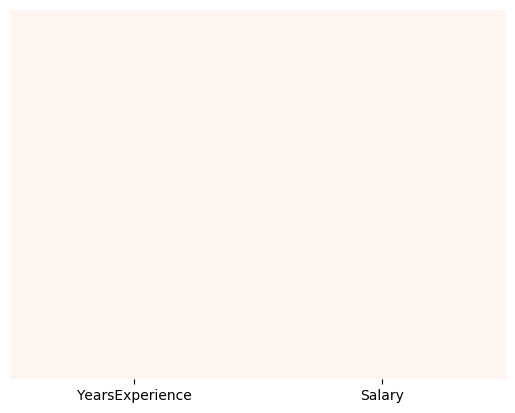

In [48]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap ="Reds") # creating heatmap 

In [49]:
df.isnull().sum() # Null Values 

YearsExperience    0
Salary             0
dtype: int64

In [50]:
df.info() # Information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [51]:
df.describe() # statical summary of dataframe

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [52]:
max = df[df['Salary'] == df['Salary'].max()] # MAX Salry with Experience

In [53]:
max

,YearsExperience,Salary
34,13.5,139465


In [54]:
df.min() # min command can be used 

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [55]:
min = df[df['Salary'] == df['Salary'].min()]
min # Get min salary with experience 

,YearsExperience,Salary
2,1.5,37731


### Plot Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1bc6b9990>,
      dtype=object)

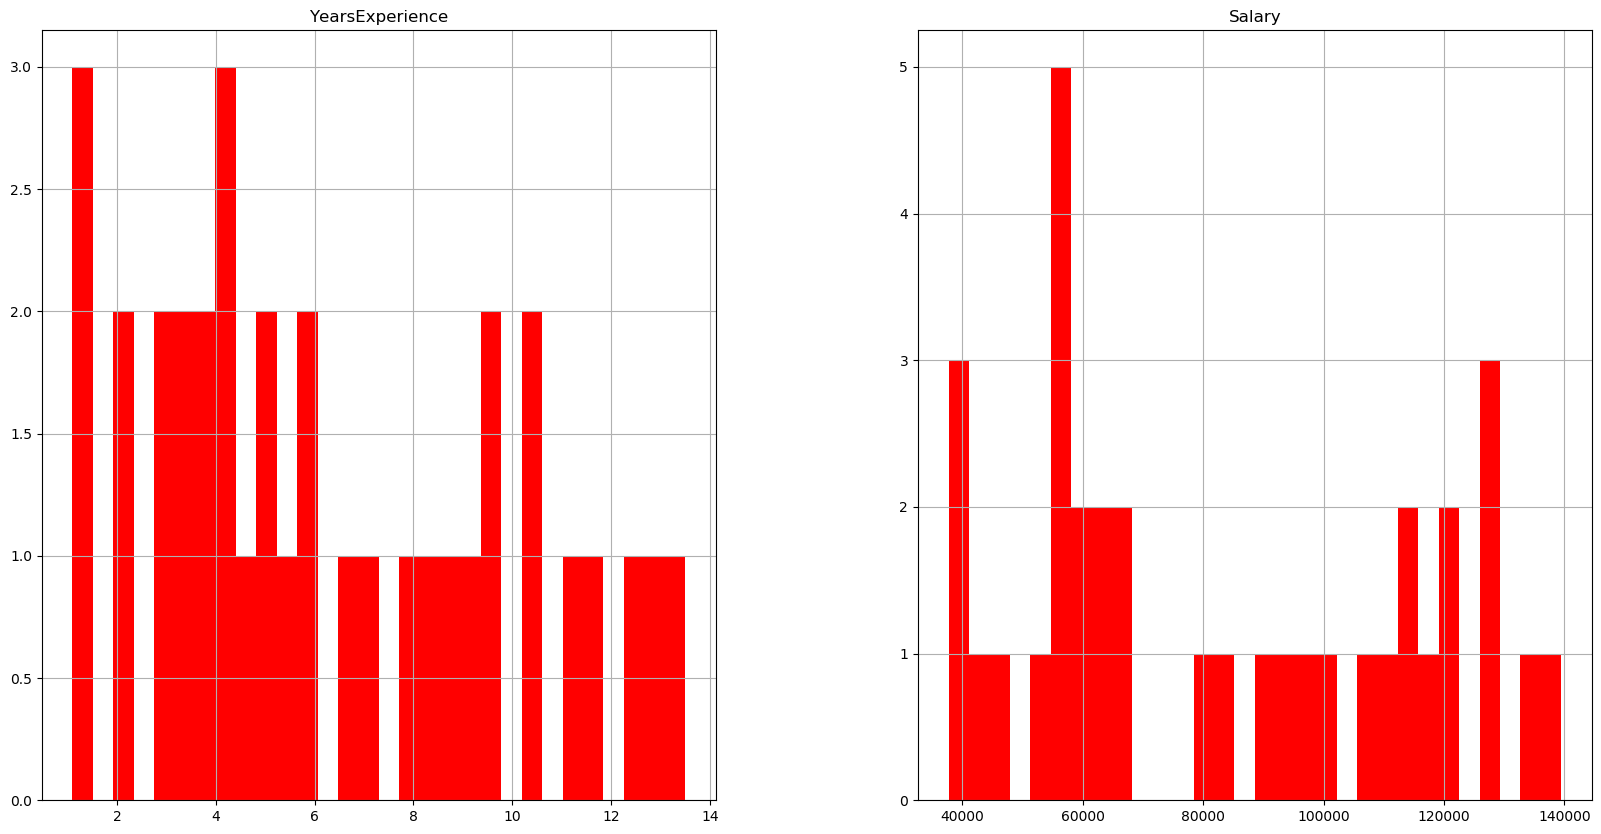

In [56]:
df.hist(bins = 30, figsize = (20,10), color = 'r') # Histogram

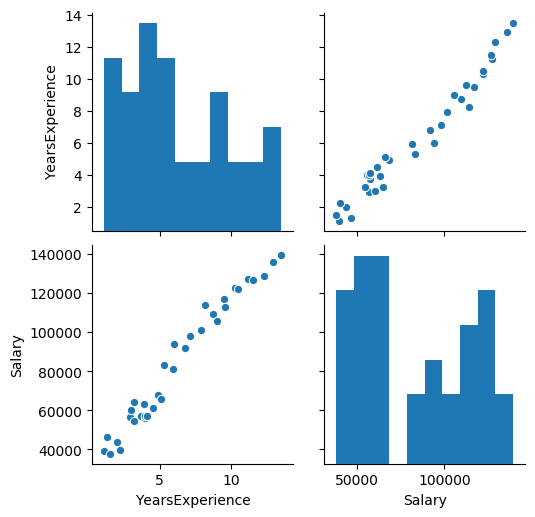

In [57]:
sns.pairplot(df) # plot the pairplot , scatter plot 

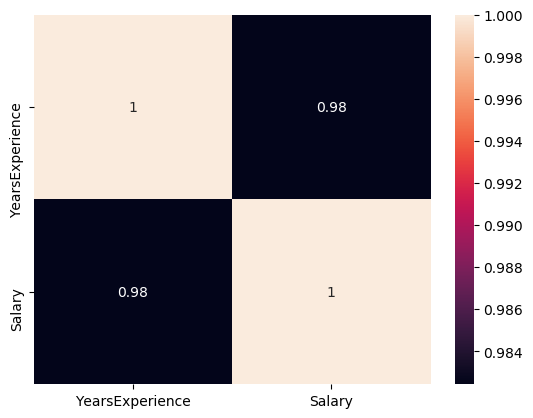

In [58]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True) # corr matrix visualization to see the correlation 
plt.show()

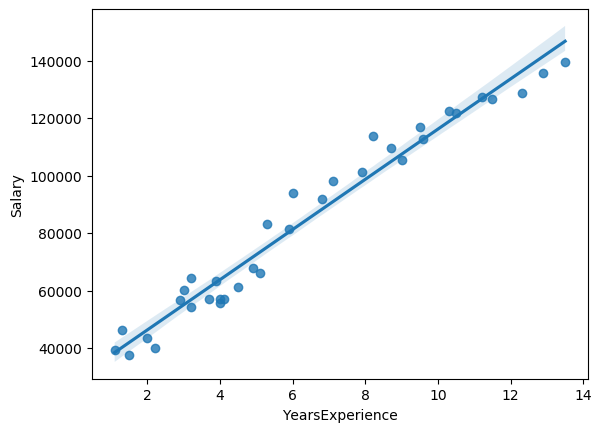

In [59]:
sns.regplot(x = 'YearsExperience' , y = 'Salary', data = df) # using of regplot to see the best fit line 

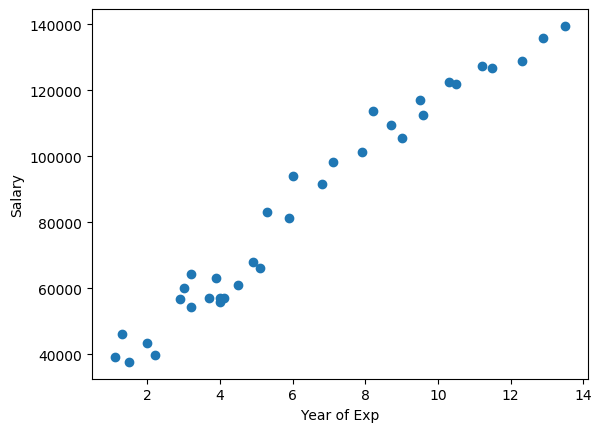

In [60]:
plt.scatter( df['YearsExperience'] ,df['Salary'] ) # Regplot another represtenation 
plt.xlabel('Year of Exp') 
plt.ylabel('Salary')
plt.show()

## Preparing training and testing data 

In [61]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [62]:
X #independent variable 

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [63]:
y # dependent variable 

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [64]:
X.shape

(35, 1)

In [65]:
y.shape

(35, 1)

In [66]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [67]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [68]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [127345.],
       [126756.],
       [128765.],
       [135675.],
       [139465.]], dtype=float32)

## Split data into train and test

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25) # 75% for training and rest for test
X_train.shape , X_test.shape , y_train.shape , y_test.shape # Getting the shape 

((26, 1), (9, 1), (26, 1), (9, 1))

## Train Linear Regression Model in SK-Learn

In [71]:
regression_model_sklearn = LinearRegression(fit_intercept =True)
regression_model_sklearn.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy 

0.967464705872589

In [74]:
print('Linear Model Cofficient (m): ',regression_model_sklearn.coef_)
print('Linear Model Cofficient (c): ',regression_model_sklearn.intercept_)

Linear Model Cofficient (m):  [[8736.332]]
Linear Model Cofficient (c):  [29840.117]


## Trained Model Performance 

In [75]:
y_predict = regression_model_sklearn.predict(X_test)

In [76]:
y_predict

array([[130307.94 ],
       [ 74395.41 ],
       [ 81384.48 ],
       [ 55175.48 ],
       [ 41197.348],
       [ 42944.617],
       [142538.8  ],
       [ 49060.047],
       [ 65659.08 ]], dtype=float32)

Text(0.5, 1.0, 'Salary Vs Number of years experience')

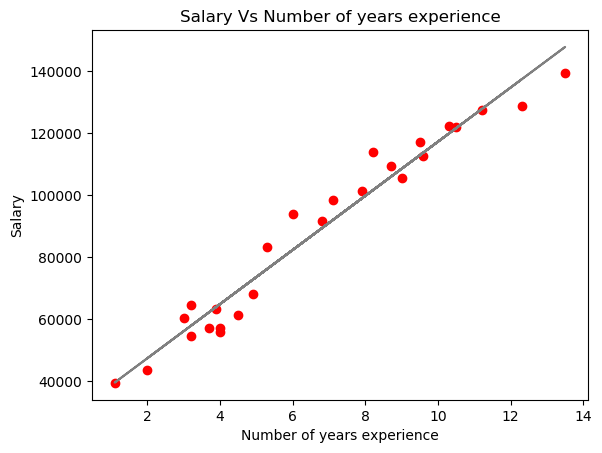

In [77]:
plt.scatter(X_train, y_train , color ='red') # scatter plot 
plt.plot(X_train, regression_model_sklearn.predict(X_train) , color ='gray')
plt.ylabel('Salary')
plt.xlabel('Number of years experience')
plt.title('Salary Vs Number of years experience')

In [78]:
num_years_exp = [[5]] # Five year of experience 

In [79]:
salary = regression_model_sklearn.predict(num_years_exp) # See the prediction on experience 

In [80]:
salary # output 

array([[73521.77734375]])

## Train a liner learner model using SAGEMAKER

In [82]:
import sagemaker
import boto3 # SDK for python 

# create sagemaker session
sagemaker_session = sagemaker.Session()

bucket = 'sagemaker-practical-utkarsh' # naming the bucket 
prefix = 'linear_learner' #Subfolder in the bucket 

role = sagemaker.get_execution_role() # IAM role setting , execution role 
print(role)

arn:aws:iam::519145880970:role/service-role/AmazonSageMaker-ExecutionRole-20230325T150250


In [83]:
X_train.shape

(26, 1)

In [84]:
y_train.shape

(26, 1)

In [85]:
y_train = y_train[:,0]

In [86]:
y_train.shape

(26,)

In [87]:
import io # deals with various input ouput data such as text ,binary,raw
import numpy as np 
import sagemaker.amazon.common as smac # sagemaker lib 
#converts the data into the numpy array to recordIO  format whuch is required by sagemaker liner learner 
buf = io.BytesIO() # it increments 1 everytime you write it 
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) #reset back to zero 

0

In [94]:
import os 
# code to upload recordIO data to s3 
key = 'linear-train-data' # key refers name of the file 
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf) #uploads the data in record io format to s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)

print('uploaded training data location: {}'.format(s3_train_data)) #print training data location in s3

uploaded training data location: s3://sagemaker-practical-utkarsh/linear_learner/train/linear-train-data


In [95]:
X_test.shape

(9, 1)

In [96]:
y_test.shape

(9, 1)

In [97]:
y_test = y_test[:,0] # for vector 

In [98]:
y_test.shape

(9,)

In [99]:
y_test 

array([126756.,  66029.,  81363.,  56642.,  46205.,  37731., 135675.,
        39891.,  57081.], dtype=float32)

In [118]:
output_location = 's3://{}/{}/output'.format(bucket, prefix) # create a output placeholder in s3
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-practical-utkarsh/linear_learner/output


In [119]:
#this code is used to get the training container of sagemaker built-in algo.simply specifiy the name of the algo.

 # all regression model are named as estimator 

import boto3
from sagemaker.image_uris import retrieve

region_name = boto3.Session().region_name
container = retrieve("linear-learner", region_name)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [121]:
linear = sagemaker.estimator.Estimator(container,
                                      role,
                                      instance_count=1,
                                      instance_type='ml.c4.xlarge',
                                      output_path=output_location,
                                      sagemaker_session=sagemaker_session,
                                      use_spot_instances=True,
                                      max_run=300,
                                      max_wait=600)

linear.set_hyperparameters(predictor_type='regressor',
                           mini_batch_size=5,
                           epochs=5,
                           num_models=32,
                           loss='absolute_loss')

linear.fit({'train': s3_train_data})



INFO:sagemaker:Creating training-job with name: linear-learner-2023-03-25-15-23-13-934


2023-03-25 15:23:14 Starting - Starting the training job...
2023-03-25 15:23:27 Starting - Preparing the instances for training......
2023-03-25 15:24:50 Downloading - Downloading input data
2023-03-25 15:24:50 Training - Downloading the training image.........
2023-03-25 15:26:11 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/25/2023 15:26:18 INFO 139677631850304] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': '

 # Deploy & Test the trained linear model

In [122]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type ='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-03-25-15-34-07-492
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-03-25-15-34-07-492
INFO:sagemaker:Creating endpoint with name linear-learner-2023-03-25-15-34-07-492


-------!

In [129]:
from sagemaker.predictor import csv_serializer, json_deserializer

# set the serializer and deserializer types for the predictor object
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

# make a prediction on a single example
prediction = linear_regressor.predict(X_test[0], initial_args={'ContentType': 'text/csv'})

# print the prediction
print(prediction)



See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 143634.03125}]}


In [130]:
result = linear_regressor.predict(X_test)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [131]:
result

{'predictions': [{'score': 143634.03125},
  {'score': 75268.625},
  {'score': 83814.3046875},
  {'score': 51768.0234375},
  {'score': 34676.66796875},
  {'score': 36813.0859375},
  {'score': 158588.96875},
  {'score': 44290.5546875},
  {'score': 64586.53125}]}

In [133]:
predictions = np.array([r['score'] for r in result['predictions']])


In [134]:
predictions

array([143634.03125   ,  75268.625     ,  83814.3046875 ,  51768.0234375 ,
        34676.66796875,  36813.0859375 , 158588.96875   ,  44290.5546875 ,
        64586.53125   ])

In [136]:
predictions.shape


(9,)

Text(0.5, 1.0, 'Salary Vs Years of Experience')

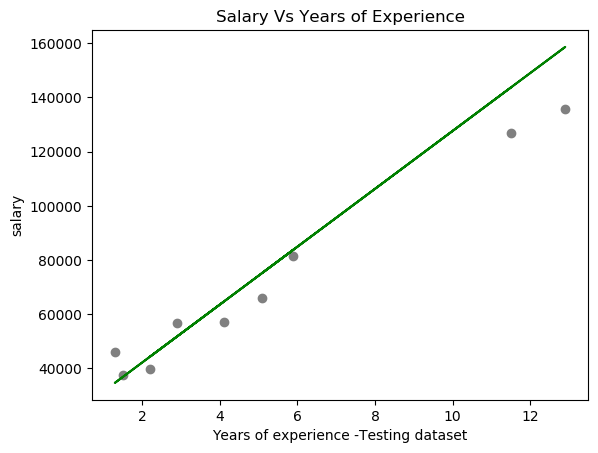

In [137]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'green')
plt.xlabel('Years of experience -Testing dataset')
plt.ylabel('salary')
plt.title('Salary Vs Years of Experience')
            

In [ ]:
linear_regression.delete_endpoint()